In [339]:
import pandas as pd

In [340]:
data = pd.read_csv("Life-Expectancy2.csv")
data.columns

Index(['Country', 'Region', 'Year', 'Infant_deaths', 'Under_five_deaths',
       'Adult_mortality', 'Alcohol_consumption', 'Hepatitis_B', 'Measles',
       'BMI', 'Polio', 'Diphtheria', 'Incidents_HIV', 'GDP_per_capita',
       'Population_mln', 'Thinness_ten_nineteen_years',
       'Thinness_five_nine_years', 'Schooling', 'Economy_status_Developed',
       'Economy_status_Developing', 'Life_expectancy'],
      dtype='object')

In [341]:
data_CRO = data[data['Country'] == 'Croatia']
data_CRO = data_CRO.sort_values('Year')

data_2015 = data[data['Year'] == 2015]

data_2015_only3 = data_2015.loc[:, ['Alcohol_consumption', 'BMI', 'Schooling']]
data_2015_only6 = data_2015.iloc[:, 3:10]

# MATPLOTLIB

In [342]:
# !pip install matplotlib       
import matplotlib.pyplot as plt 

Linijski graf

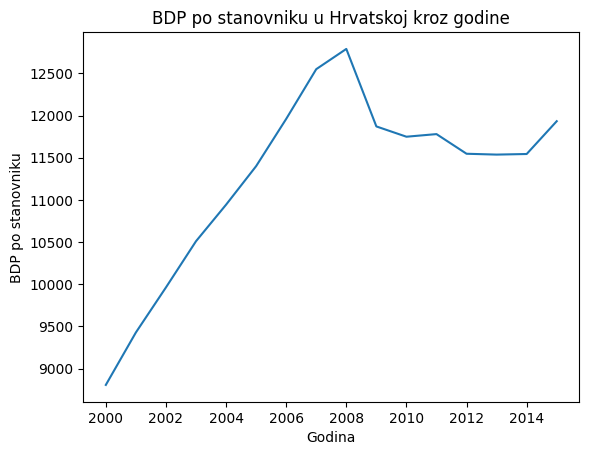

In [343]:
plt.plot(data_CRO['Year'], data_CRO['GDP_per_capita']) 

plt.xlabel('Godina')
plt.ylabel('BDP po stanovniku')
plt.title('BDP po stanovniku u Hrvatskoj kroz godine')

plt.show()

Graf raspšenosti - radije barplot?

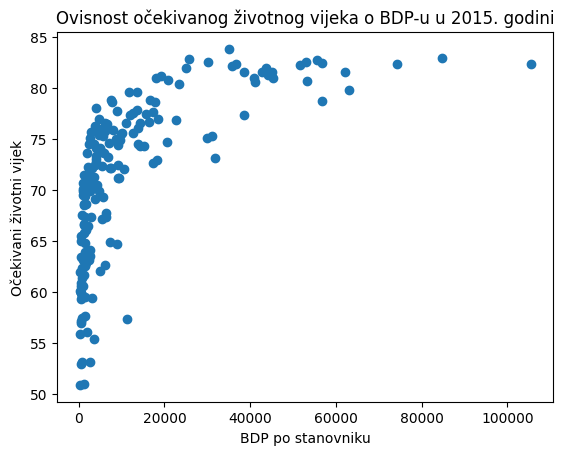

In [344]:
x = data_2015['GDP_per_capita']
y = data_2015['Life_expectancy']

plt.scatter(x, y)

plt.title("Ovisnost očekivanog životnog vijeka o BDP-u u 2015. godini")
plt.xlabel("BDP po stanovniku")
plt.ylabel("Očekivani životni vijek")

plt.show()

Violin Plot

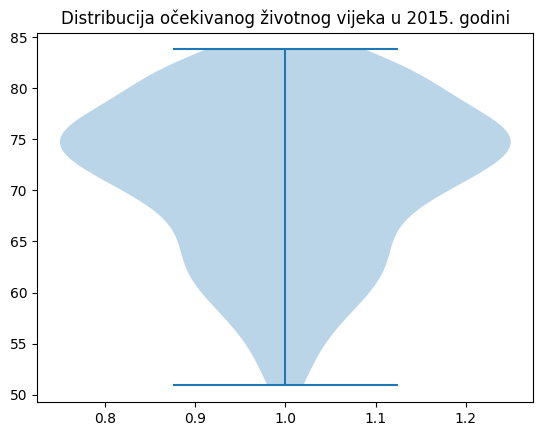

In [345]:
plt.violinplot(data_2015['Life_expectancy'])
plt.title("Distribucija očekivanog životnog vijeka u 2015. godini")

plt.show()

Piechart

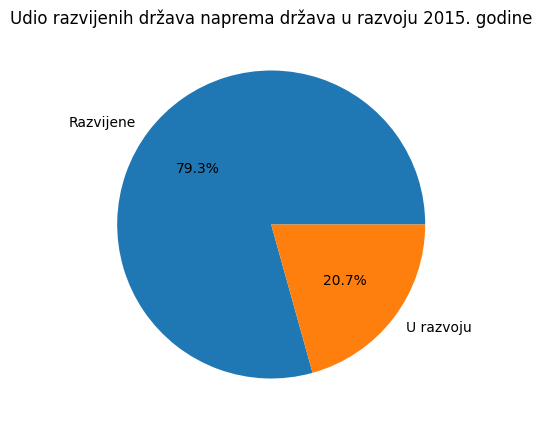

In [346]:
data_grouped = data_2015.groupby('Economy_status_Developed').size()
labels = ['Razvijene', 'U razvoju']
values = data_grouped.values

plt.figure(figsize=(8, 5))
plt.pie(values, labels=labels, autopct='%1.1f%%') 
plt.title('Udio razvijenih država naprema država u razvoju 2015. godine')
plt.show()

# SEABORN

In [347]:
# !pip install seaborn
import seaborn as sns

Pair Plot - grafovi raspršenosti za svake dvije varijable

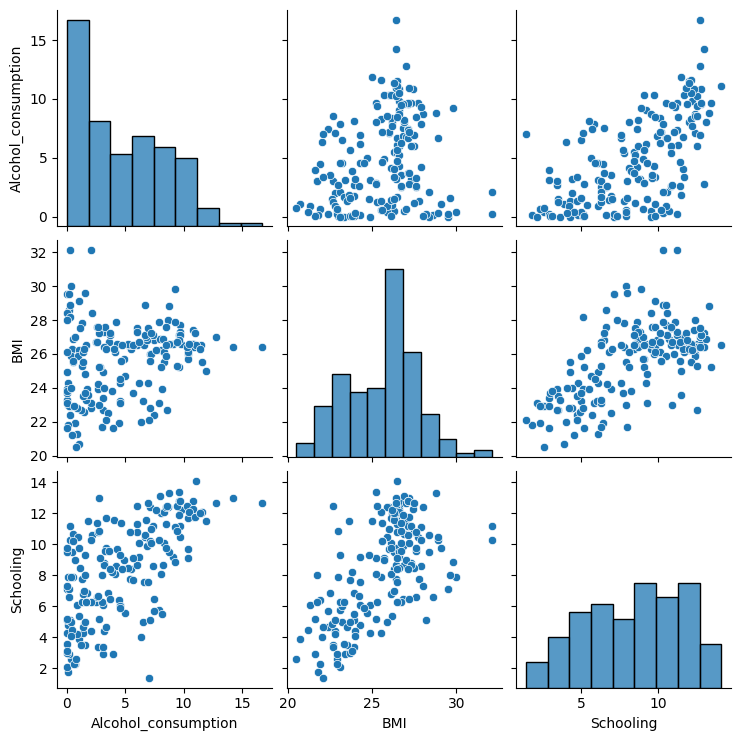

In [348]:
sns.pairplot(data_2015_only3)

Heatmap

<Axes: >

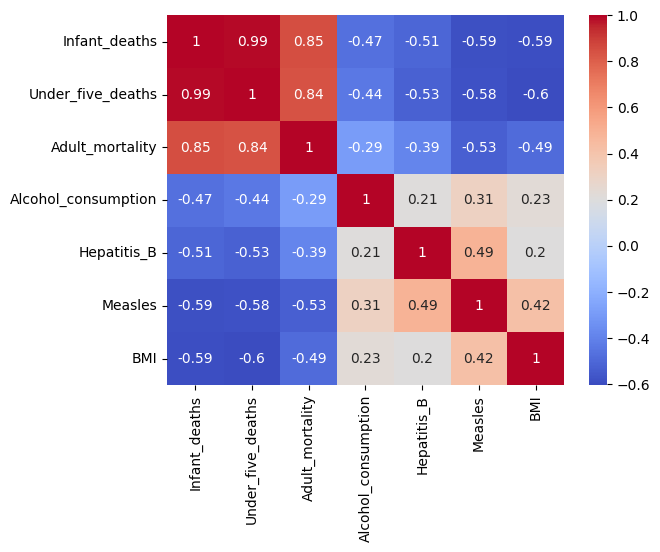

In [349]:
sns.heatmap(data_2015_only6.corr(), annot=True, cmap='coolwarm')

# PLOTLY

In [350]:
# !pip install plotly
import plotly.express as px

Mjeurićasti dijagram

In [351]:
bubble_chart = px.scatter(
    data_2015,                # skup podataka tipa dataframe
    x="Infant_deaths",        # pridruživanje podataka x-osi          
    y="Life_expectancy",      # pridruživanje podataka y-osi 
    size="Population_mln",    # veličina točke ovisi o populaciji
    size_max = 60,
    color="Country",           # boja točke prema državi 
    hover_name="Country",      # prikaz naziva države pri prelasku mišem
    title="Ovisnost očekivanog životnog vijeka o smrtnosti doječadi za 2015. godinu", 
    labels={"Infant_deaths":"Smrtnost dojenčadi", "Country":"Država", 
            "Life_expectancy":"Očekivani životni vijek", "Population_mln":"Populacija u milijonima"} # mijenjanje natpisa
)

# dodavanje naziva osi
bubble_chart.update_layout(
    xaxis_title="Smrtnost dojenčadi",
    yaxis_title="Očekivani životni vijek"
)

bubble_chart.write_html("bubble_chart.html")

Choropleth map

In [352]:
choropleth_map = px.choropleth(
        data_2015, 
        locations="Country",            # ime države
        locationmode="country names",   # mapiranje po imenu države, moguće vrijednosti: ['ISO-3', 'USA-states', 'country names', 'geojson-id']
        color="GDP_per_capita",         # boja na karti prema visini BDP-a
        hover_name="Country",           # prikaz naziva države pri prelasku mišem
        color_continuous_scale=px.colors.sequential.Oranges,                # biranje jednobojne skale
        title="BDP po stanovniku u 2015.",                                  # naslov grafa
        labels={"GDP_per_capita": "BDP po stanovniku", "Country": "Država"} # mijenjanje natpisa
    )

choropleth_map.write_html("choropleth_map.html")

# GGPLOT

In [353]:
# !pip install ggplot
# !pip install plotnine
from plotnine import ggplot, aes, geom_line, labs, theme_minimal, ggsave, guides, guide_legend, geom_bar, theme, element_text, scale_fill_manual

Linijski graf

In [354]:
data_jugo = data[data['Country'].isin(['Croatia', 'Slovenia', 'Serbia'])]

plot = ggplot(data_jugo, aes(x='Year', y='GDP_per_capita', color='Country')) + \
       geom_line() + \
       labs(title='Usporedba BDP-a po stanovniku za Hrvatsku, Sloveniju i Srbiju',
            x='Godina',
            y='BDP po stanovniku ($)') + \
       theme_minimal() + \
       guides(color=guide_legend(title='Država'))

ggsave(plot, filename="bdp_jugo.png", dpi=300)

d:\Stvarčice\i-Days\myenv\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\Stvarčice\i-Days\myenv\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: bdp_jugo.png


Mozaik graf

In [357]:
# Kreiramo stacked bar plot s ručno postavljenim bojama i rotiranim oznakama na x-osi
plot = (
    ggplot(data_2015, aes(x='Region', fill='factor(Economy_status_Developed)')) +
    geom_bar(position='fill') +  # 'fill' omogućava prikaz proporcija
    labs(
        title="Ekonomski status država po regiji u 2015. godini",
        x="Regija",
        y="Omjer",
        fill="Ekonomski status države"
    ) +
    theme_minimal() +
    theme(axis_text_x=element_text(angle=45, hjust=1)) +  # Rotiramo oznake na x-osi
    scale_fill_manual(values=["#2E86C1", "#E74C3C"],  # Ručno dodajemo boje za razvijene i nerazvijene
                      labels=["U razvoju", "Razvijene"])  # Dodajemo oznake u legendu
)

ggsave(plot, filename="mozaik_plot.png", dpi=300)

d:\Stvarčice\i-Days\myenv\Lib\site-packages\plotnine\ggplot.py:615: PlotnineWarning: Saving 6.4 x 4.8 in image.
d:\Stvarčice\i-Days\myenv\Lib\site-packages\plotnine\ggplot.py:616: PlotnineWarning: Filename: mozaik_plot.png


# GEOPLOTLIB

In [356]:
#!pip install --upgrade setuptools==57.5.0 
#!pip install --upgrade pip
!pip install pyglet
!pip install geoplotlib
import geoplotlib
from geoplotlib import GeoPlot
import geopandas as gpd


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached geoplotlib-0.3.2.tar.gz (22 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [1 lines of output]
      error in geoplotlib setup command: use_2to3 is invalid.
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


ModuleNotFoundError: No module named 'geoplotlib'

# ALTAIR

In [ ]:
#!pip install altair
import altair as alt


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached altair-5.4.1-py3-none-any.whl.metadata (9.4 kB)
Using cached altair-5.4.1-py3-none-any.whl (658 kB)
   ---------------------------------------- 0.0/208.1 kB ? eta -:--:--
   ----------- ---------------------------- 61.4/208.1 kB 1.7 MB/s eta 0:00:01
   --------------------------- ------------ 143.4/208.1 kB 2.1 MB/s eta 0:00:01
   ---------------------------------------- 208.1/208.1 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/133.3 kB ? eta -:--:--
   --------------------------------- ------ 112.6/133.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 133.3/133.3 kB 2.0 MB/s eta 0:00:00


In [ ]:
box_plot = alt.Chart(data_2015).mark_boxplot().encode(
    x=alt.X('Region:N', title='Regija', axis=alt.Axis(labelAngle=-45)),
    y=alt.Y('Life_expectancy:Q', title='Očekivani životni vijek'),
    color=alt.Color('Region:N', legend=None)
).properties(
    width=400,
    height=300,
    title="BDP po stanovniku po regijama za 2015. godinu"
)

box_plot.display()

alt.Chart(...)